In [278]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_excel("data1.xlsx")
df

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,NaN,9.0,Sunny
2,2017-01-05,28.0,NaN,Snow
3,2017-01-06,NaN,7.0,NaN
4,2017-01-07,32.0,NaN,Rain
5,2017-01-08,NaN,NaN,Sunny
6,2017-01-09,NaN,NaN,NaN
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


### Introducing date column

In [279]:
df = pd.read_excel("data1.xlsx", parse_dates=["day"])
#Setting indexing day as date column
df.set_index("day", inplace =True)
df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


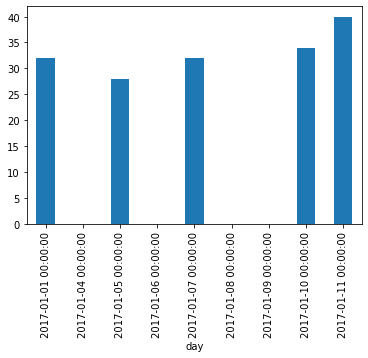

In [280]:
df.temperature.plot.bar()
plt.show()

In [281]:
#Filling every empty NA entry with 0
new_df = df.fillna(0)
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,0.0,9.0,Sunny
2017-01-05,28.0,0.0,Snow
2017-01-06,0.0,7.0,0
2017-01-07,32.0,0.0,Rain
2017-01-08,0.0,0.0,Sunny
2017-01-09,0.0,0.0,0
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [282]:
#Specify each NA entry with specific thing
new_df = df.fillna({"temperature": 0, "windspeed":0, "event": "no event"})
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,0.0,9.0,Sunny
2017-01-05,28.0,0.0,Snow
2017-01-06,0.0,7.0,no event
2017-01-07,32.0,0.0,Rain
2017-01-08,0.0,0.0,Sunny
2017-01-09,0.0,0.0,no event
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [283]:
#Filling each NA entry with the previous entry
new_df = df.fillna(method ="ffill" )


In [284]:
#Filling each NA entry with the next entry
new_df = df.fillna(method="bfill")
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,28.0,9.0,Sunny
2017-01-05,28.0,7.0,Snow
2017-01-06,32.0,7.0,Rain
2017-01-07,32.0,8.0,Rain
2017-01-08,34.0,8.0,Sunny
2017-01-09,34.0,8.0,Cloudy
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


### Interpolating the NA entries linearly.

            temperature  windspeed   event
day                                       
2017-01-01    32.000000       6.00    Rain
2017-01-04    30.000000       9.00   Sunny
2017-01-05    28.000000       8.00    Snow
2017-01-06    30.000000       7.00     NaN
2017-01-07    32.000000       7.25    Rain
2017-01-08    32.666667       7.50   Sunny
2017-01-09    33.333333       7.75     NaN
2017-01-10    34.000000       8.00  Cloudy
2017-01-11    40.000000      12.00   Sunny


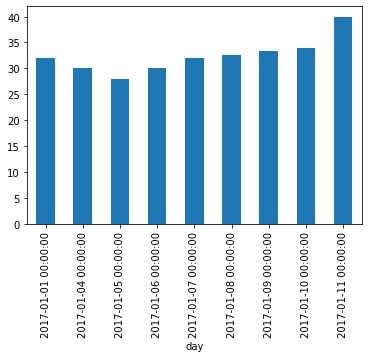

In [285]:
new_df = df.interpolate()
print(new_df)
new_df.temperature.plot.bar()
plt.show()

### However, since there are not given some months, it is not realistic

            temperature  windspeed   event
day                                       
2017-01-01    32.000000       6.00    Rain
2017-01-04    29.000000       9.00   Sunny
2017-01-05    28.000000       8.00    Snow
2017-01-06    30.000000       7.00     NaN
2017-01-07    32.000000       7.25    Rain
2017-01-08    32.666667       7.50   Sunny
2017-01-09    33.333333       7.75     NaN
2017-01-10    34.000000       8.00  Cloudy
2017-01-11    40.000000      12.00   Sunny


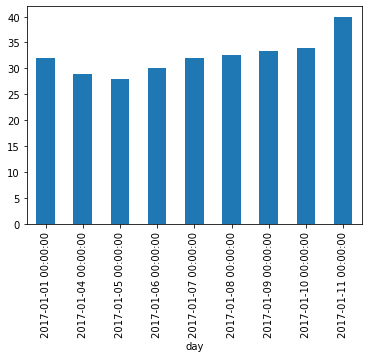

In [286]:
new_df = df.interpolate(method="time")
print(new_df)
new_df.temperature.plot.bar()
plt.show()

### Dropping each row with NA

In [287]:
new_df = df.dropna()
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


### Keeping each row which have at least 2 entries given, and dropping the rest

In [288]:
new_df = df.dropna(thresh =2)
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-07,32.0,NaN,Rain
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


### Adding not given dates to the dataframe

In [289]:
index = ['Firefox', 'Chrome', 'Safari', 'IE10', 'Konqueror']
df2 = pd.DataFrame({'http_status': [200, 200, 404, 404, 301],
                   'response_time': [0.04, 0.02, 0.07, 0.08, 1.0]},index=index)
df2

,http_status,response_time
Firefox,200,0.04
Chrome,200,0.02
Safari,404,0.07
IE10,404,0.08
Konqueror,301,1.00


In [290]:
new_index = ['Safari', 'Iceweasel', 'Comodo Dragon', 'IE10','Chrome']
df2.reindex(new_index)

,http_status,response_time
Safari,404.0,0.07
Iceweasel,NaN,NaN
Comodo Dragon,NaN,NaN
IE10,404.0,0.08
Chrome,200.0,0.02


In [291]:
#EXAMPLE 3
date_index = pd.date_range("2010/01/01", periods = 6, freq="D")
df3 = pd.DataFrame({"prices": [100,101, np.nan, 100,89,88]}
                  ,index = date_index)
df3

,prices
2010-01-01,100.0
2010-01-02,101.0
2010-01-03,NaN
2010-01-04,100.0
2010-01-05,89.0
2010-01-06,88.0


In [292]:
date_index2 = pd.date_range("12/29/2009", periods=10, freq="D")
df4 = df3.reindex(date_index2)
df4

,prices
2009-12-29,NaN
2009-12-30,NaN
2009-12-31,NaN
2010-01-01,100.0
2010-01-02,101.0
2010-01-03,NaN
2010-01-04,100.0
2010-01-05,89.0
2010-01-06,88.0
2010-01-07,NaN


In [329]:
#EXAMPLE 3
df = pd.read_excel("data1.xlsx", parse_dates = ["day"])
df.set_index("day", inplace =True)
print(df)
dt = pd.date_range("01-01-2017","01-11-2017")
dt

            temperature  windspeed   event
day                                       
2017-01-01         32.0        6.0    Rain
2017-01-04          NaN        9.0   Sunny
2017-01-05         28.0        NaN    Snow
2017-01-06          NaN        7.0     NaN
2017-01-07         32.0        NaN    Rain
2017-01-08          NaN        NaN   Sunny
2017-01-09          NaN        NaN     NaN
2017-01-10         34.0        8.0  Cloudy
2017-01-11         40.0       12.0   Sunny


DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10', '2017-01-11'],
              dtype='datetime64[ns]', freq='D')

In [330]:
idx = pd.DatetimeIndex(dt)
idx

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10', '2017-01-11'],
              dtype='datetime64[ns]', freq='D')

In [331]:
print(df)
df1 =df.reindex(idx)
df1

            temperature  windspeed   event
day                                       
2017-01-01         32.0        6.0    Rain
2017-01-04          NaN        9.0   Sunny
2017-01-05         28.0        NaN    Snow
2017-01-06          NaN        7.0     NaN
2017-01-07         32.0        NaN    Rain
2017-01-08          NaN        NaN   Sunny
2017-01-09          NaN        NaN     NaN
2017-01-10         34.0        8.0  Cloudy
2017-01-11         40.0       12.0   Sunny


,temperature,windspeed,event
2017-01-01,32.0,6.0,Rain
2017-01-02,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy


            temperature  windspeed   event
2017-01-01    32.000000       6.00    Rain
2017-01-02    31.000000       7.00     NaN
2017-01-03    30.000000       8.00     NaN
2017-01-04    29.000000       9.00   Sunny
2017-01-05    28.000000       8.00    Snow
2017-01-06    30.000000       7.00     NaN
2017-01-07    32.000000       7.25    Rain
2017-01-08    32.666667       7.50   Sunny
2017-01-09    33.333333       7.75     NaN
2017-01-10    34.000000       8.00  Cloudy
2017-01-11    40.000000      12.00   Sunny


<AxesSubplot:>

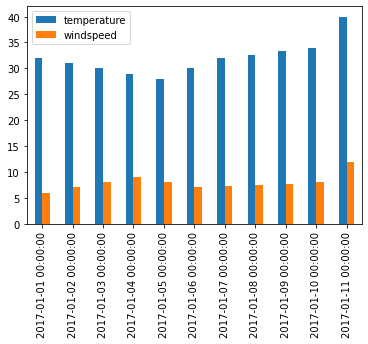

In [332]:
df1 = df1.interpolate(method= "time")
print(df1)
df1.plot.bar()

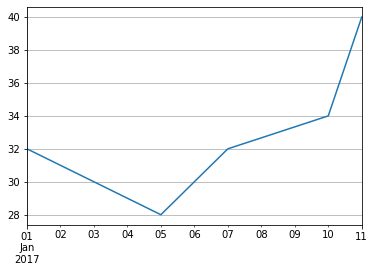

In [344]:
df1["temperature"].plot()
plt.grid()
plt.show()  